Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


** frog **


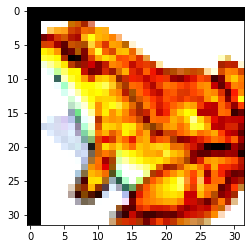

data.shape : torch.Size([128, 3, 32, 32])
target.shape : torch.Size([128])

images.shape: torch.Size([128, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


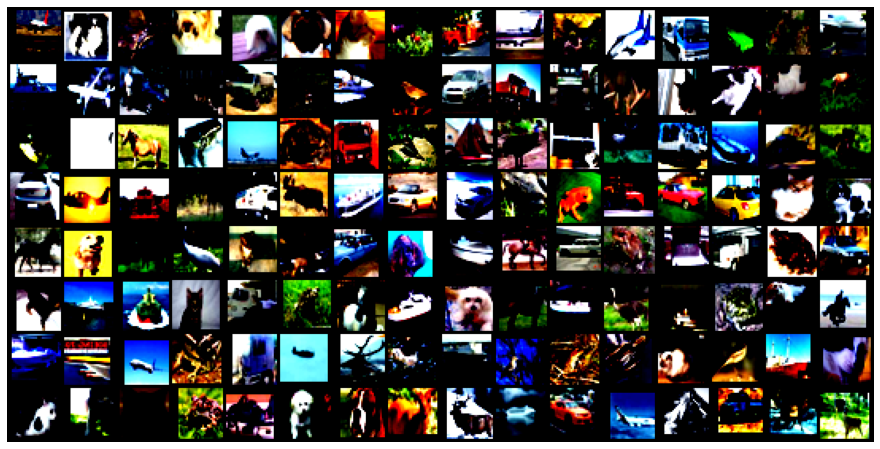

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import time
import os
import torch.backends.cudnn as cudnn

dic = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog',
       6:'frog', 7:'horse', 8:'ship', 9:'truck'}

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
start_time = time.time()
batch_size = 128
learning_rate = 0.1

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding = 4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
                          std=(0.2471, 0.2436, 0.2616))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
                          std=(0.2471, 0.2436, 0.2616))
])


train_dataset = datasets.CIFAR10(root='/home/ljj0512/private/project/data',
                                 train=True,
                                 transform=transform_train,
                                 download=True)

test_dataset = datasets.CIFAR10(root='/home/ljj0512/private/project/data',
                                train=False,
                                transform=transform_test,
                                download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=2)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=2)


import matplotlib.pyplot as plt
from torchvision.utils import make_grid

for idx, (data, target) in enumerate(train_loader):
  if idx == 1:
    break
  print('**',dic[target[0].item()],'**')
  plt.imshow(data[0].permute(1,2,0))
  plt.show()
  print('data.shape :',data.shape) # batch_size, C, H, W
  print('target.shape :',target.shape)
  print()


for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break
plt.show()